In [9]:
import gensim
import itertools
import re
import csv
import scipy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
exts = ['bio', 'wiki']
# gender words
w_words = ['she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl', 'herself', 
           'female', 'sister', 'daughters', 'mothers', 'women', 'girls', 'females',
          'sisters', 'aunt', 'aunts', 'niece', 'nieces']
m_words = ['he', 'son', 'his', 'him', 'father', 'man', 'boy', 'himself', 
           'male', 'brother', 'son', 'father', 'men', 'boys', 'males',
          'brothers', 'uncles', 'uncle', 'nephew', 'nephews']
# occupations and streotypes
occs = pd.read_csv('../data/mturk_stereotypes.csv')
occs.head()

,occupation,stereotype_score
0,solicitor,1.500000
1,ballerina,3.500000
2,negotiator,1.555556
3,strategist,1.700000
4,sergeant,1.100000


In [3]:
bio = gensim.models.KeyedVectors.load_word2vec_format(
    "../data/bioASQmodel.txt", 
    binary=False, 
    unicode_errors='ignore'
)
wiki = gensim.models.KeyedVectors.load_word2vec_format(
    "../data/enwiki_20180420_300d.txt", 
    binary=False, 
    unicode_errors='ignore'
)

models = [bio, wiki]

In [4]:
for i in occs.index:
    job = occs.loc[i,'occupation']
    for j,m in enumerate(models):
        if job in m:
            sim = []
            for word1 in w_words:
                cosine_similarity = m.similarity(word1, job)
                sim.append(cosine_similarity)
            occs.loc[i,f'w_dist_{exts[j]}'] = np.nanmean(sim)
            sim = []
            for word1 in m_words:
                cosine_similarity = m.similarity(word1, job)
                sim.append(cosine_similarity)
            occs.loc[i,f'm_dist_{exts[j]}'] = np.nanmean(sim)
occs.head()

,occupation,stereotype_score,w_dist_bio,m_dist_bio,w_dist_wiki,m_dist_wiki
0,solicitor,1.500000,0.249729,0.284720,0.235260,0.268895
1,ballerina,3.500000,0.210674,0.246042,0.338919,0.186841
2,negotiator,1.555556,0.182634,0.221924,0.182327,0.234566
3,strategist,1.700000,0.149639,0.166917,0.175612,0.234679
4,sergeant,1.100000,0.164709,0.217827,0.166129,0.241777


In [5]:
occs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   occupation        320 non-null    object 
 1   stereotype_score  320 non-null    float64
 2   w_dist_bio        262 non-null    float64
 3   m_dist_bio        262 non-null    float64
 4   w_dist_wiki       291 non-null    float64
 5   m_dist_wiki       291 non-null    float64
dtypes: float64(5), object(1)
memory usage: 15.1+ KB


(0.028396447486434835, 0.6472892914579882)

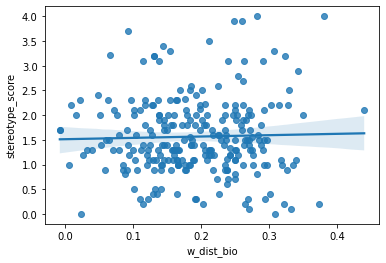

In [6]:
plot_data = occs[[not x for x in occs['w_dist_bio'].isna()]]
sns.regplot(data=plot_data, x='w_dist_bio', y='stereotype_score')
pearsonr(plot_data['w_dist_bio'], plot_data['stereotype_score'])

(-0.010717179310045634, 0.8629279621614662)

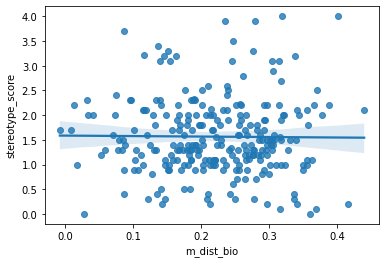

In [7]:
plot_data = occs[[not x for x in occs['w_dist_bio'].isna()]]
sns.regplot(data=plot_data, x='m_dist_bio', y='stereotype_score')
pearsonr(plot_data['m_dist_bio'], plot_data['stereotype_score'])

(0.491673499342872, 4.058489738520571e-19)

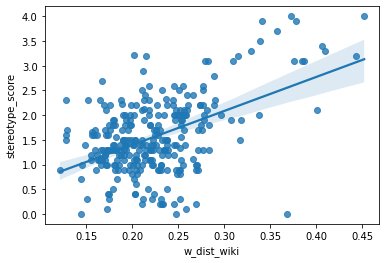

In [12]:
plot_data = occs[[not x for x in occs['w_dist_wiki'].isna()]]
sns.regplot(data=plot_data, x='w_dist_wiki', y='stereotype_score')
plt.savefig("../img/wiki.pdf")
pearsonr(plot_data['w_dist_wiki'], plot_data['stereotype_score'])

(-0.17192750794463282, 0.0032591126138188696)

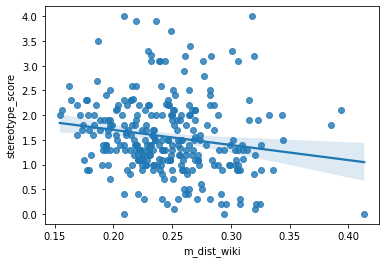

In [11]:
plot_data = occs[[not x for x in occs['w_dist_wiki'].isna()]]
sns.regplot(data=plot_data, x='m_dist_wiki', y='stereotype_score')
pearsonr(plot_data['m_dist_wiki'], plot_data['stereotype_score'])